In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

[PosixPath('sgemm_performance/precision_sgemm_performance.csv'), PosixPath('bike_share/precision_bike_share.csv'), PosixPath('drugs_review/precision_drug_reviews.csv'), PosixPath('covtype/precision_covtype.csv'), PosixPath('nursery/precision_nursery.csv'), PosixPath('adult/precision_adult.csv')]
PRECISION_SGEMM_PERFORMANCE


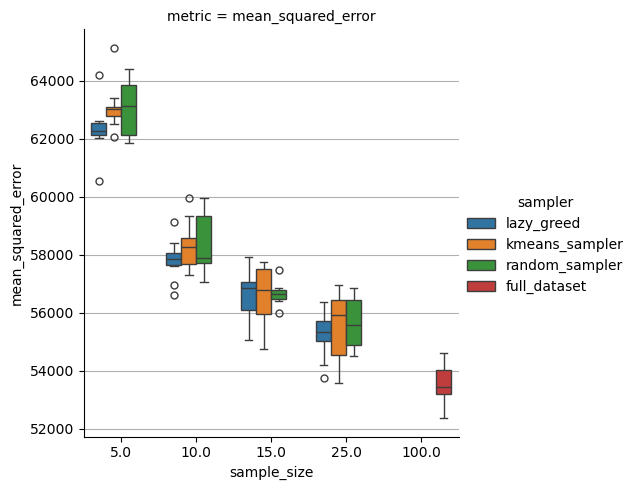

In [2]:
curdir = Path()
files = [*curdir.rglob('precision*.csv')]

print(files)

print(f'{files[0].stem.upper()}')


result = pd.read_csv(files[0])
result['sample_size'] = (result['sample_size'] / result['train_size']).round(2) * 100
sns.catplot(data=result[result.sample_size>4], x='sample_size', y='value', hue='sampler', kind='box', col='metric')
# sns.catplot(data=result, x='sample_size', y='value', hue='sampler', kind='box', col='metric')
# plt.title(f'{files[1].stem.upper()} dataset', fontsize=10)
plt.ylabel(result.metric.unique()[0])
plt.grid(axis='y')
# plt.yscale('log')
# plt.tight_layout()
plt.show()

[PosixPath('sgemm_performance/precision_sgemm_performance.csv'), PosixPath('bike_share/precision_bike_share.csv'), PosixPath('drugs_review/precision_drug_reviews.csv'), PosixPath('covtype/precision_covtype.csv'), PosixPath('nursery/precision_nursery.csv'), PosixPath('adult/precision_adult.csv')]
PRECISION_BIKE_SHARE


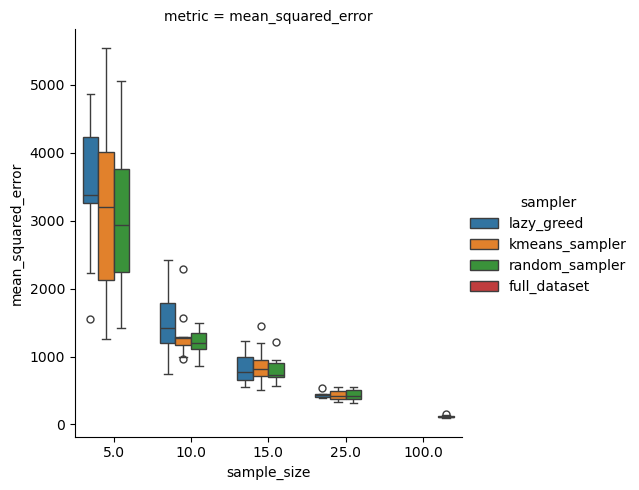

In [3]:
curdir = Path()
files = [*curdir.rglob('precision*.csv')]

print(files)

print(f'{files[1].stem.upper()}')


result = pd.read_csv(files[1])
result['sample_size'] = (result['sample_size'] / result['train_size']).round(2) * 100
sns.catplot(data=result[result.sample_size > 4], x='sample_size', y='value', hue='sampler', kind='box', col='metric')
# sns.catplot(data=result, x='sample_size', y='value', hue='sampler', kind='box', col='metric')
# plt.title(f'{files[1].stem.upper()} dataset', fontsize=10)
plt.ylabel(result.metric.unique()[0])
# plt.tight_layout()
plt.show()

[PosixPath('sgemm_performance/precision_sgemm_performance.csv'), PosixPath('bike_share/precision_bike_share.csv'), PosixPath('drugs_review/precision_drug_reviews.csv'), PosixPath('covtype/precision_covtype.csv'), PosixPath('nursery/precision_nursery.csv'), PosixPath('adult/precision_adult.csv')]
PRECISION_DRUG_REVIEWS


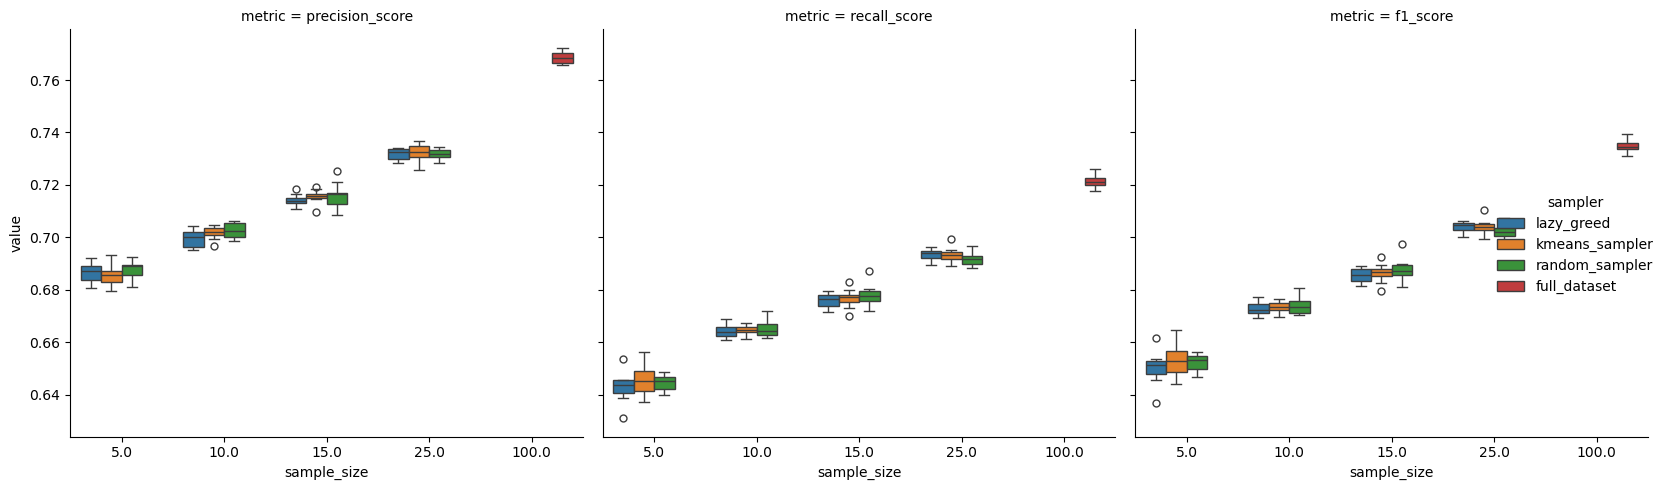

In [4]:
curdir = Path()
files = [*curdir.rglob('precision*.csv')]

print(files)

print(f'{files[2].stem.upper()}')


result = pd.read_csv(files[2])
result['sample_size'] = (result['sample_size'] / result['train_size']).round(2) * 100
sns.catplot(data=result[result.sample_size>4], x='sample_size', y='value', hue='sampler', kind='box', col='metric')
# sns.catplot(data=result, x='sample_size', y='value', hue='sampler', kind='box', col='metric')
plt.ylabel(result.metric.unique()[0])
plt.tight_layout()
plt.show()

[PosixPath('sgemm_performance/precision_sgemm_performance.csv'), PosixPath('bike_share/precision_bike_share.csv'), PosixPath('drugs_review/precision_drug_reviews.csv'), PosixPath('covtype/precision_covtype.csv'), PosixPath('nursery/precision_nursery.csv'), PosixPath('adult/precision_adult.csv')]
PRECISION_COVTYPE


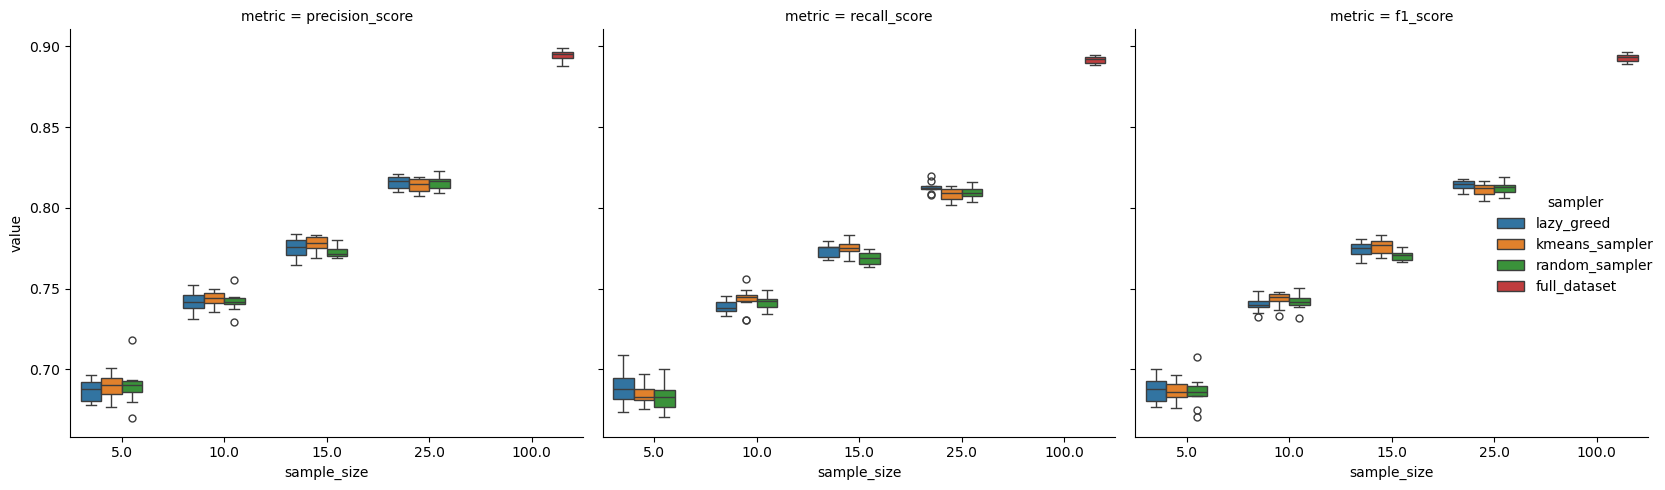

In [5]:
curdir = Path()
files = [*curdir.rglob('precision*.csv')]

print(files)

print(f'{files[3].stem.upper()}')


result = pd.read_csv(files[3])
result['sample_size'] = (result['sample_size'] / result['train_size']).round(2) * 100
sns.catplot(data=result[result.sample_size>4], x='sample_size', y='value', hue='sampler', kind='box', col='metric')
# sns.catplot(data=result, x='sample_size', y='value', hue='sampler', kind='box', col='metric')
plt.ylabel(result.metric.unique()[0])
plt.tight_layout()
plt.show()

[PosixPath('sgemm_performance/precision_sgemm_performance.csv'), PosixPath('bike_share/precision_bike_share.csv'), PosixPath('drugs_review/precision_drug_reviews.csv'), PosixPath('covtype/precision_covtype.csv'), PosixPath('nursery/precision_nursery.csv'), PosixPath('adult/precision_adult.csv')]
PRECISION_NURSERY


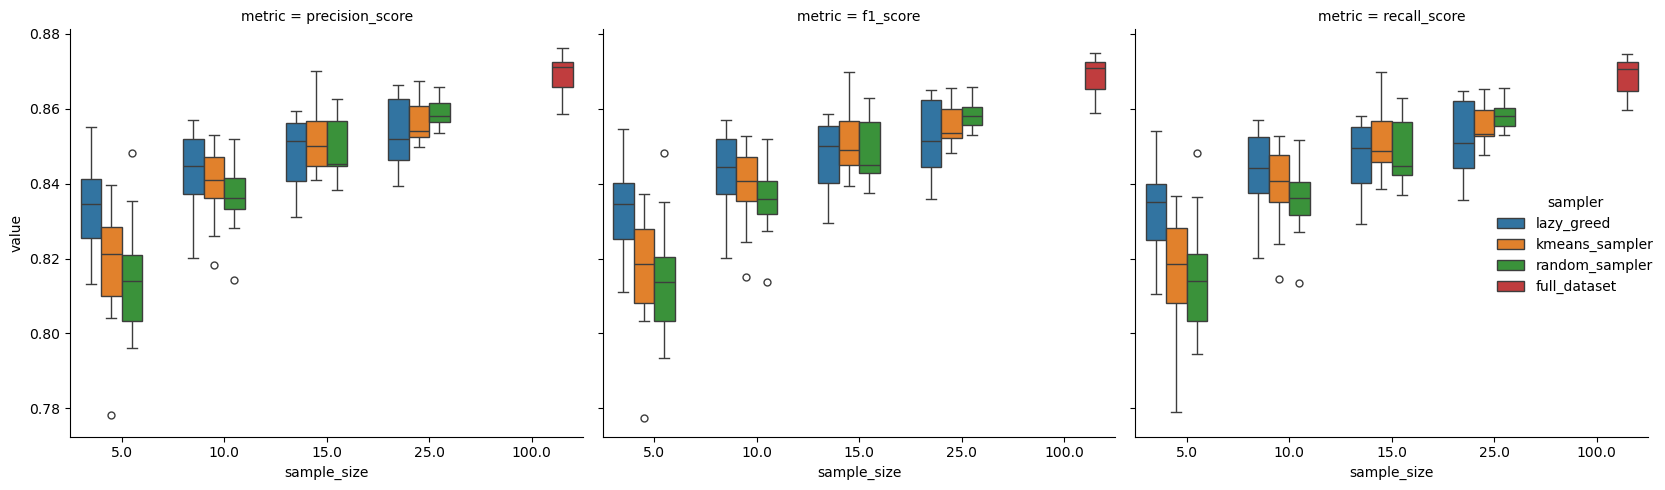

In [6]:
curdir = Path()
files = [*curdir.rglob('precision*.csv')]

print(files)

print(f'{files[4].stem.upper()}')


result = pd.read_csv(files[4])
result['sample_size'] = (result['sample_size'] / result['train_size']).round(2) * 100
sns.catplot(data=result[result.sample_size>4], x='sample_size', y='value', hue='sampler', kind='box', col='metric')
# sns.catplot(data=result, x='sample_size', y='value', hue='sampler', kind='box', col='metric')
plt.ylabel(result.metric.unique()[0])
plt.tight_layout()
plt.show()

[PosixPath('sgemm_performance/precision_sgemm_performance.csv'), PosixPath('bike_share/precision_bike_share.csv'), PosixPath('drugs_review/precision_drug_reviews.csv'), PosixPath('covtype/precision_covtype.csv'), PosixPath('nursery/precision_nursery.csv'), PosixPath('adult/precision_adult.csv')]
PRECISION_ADULT


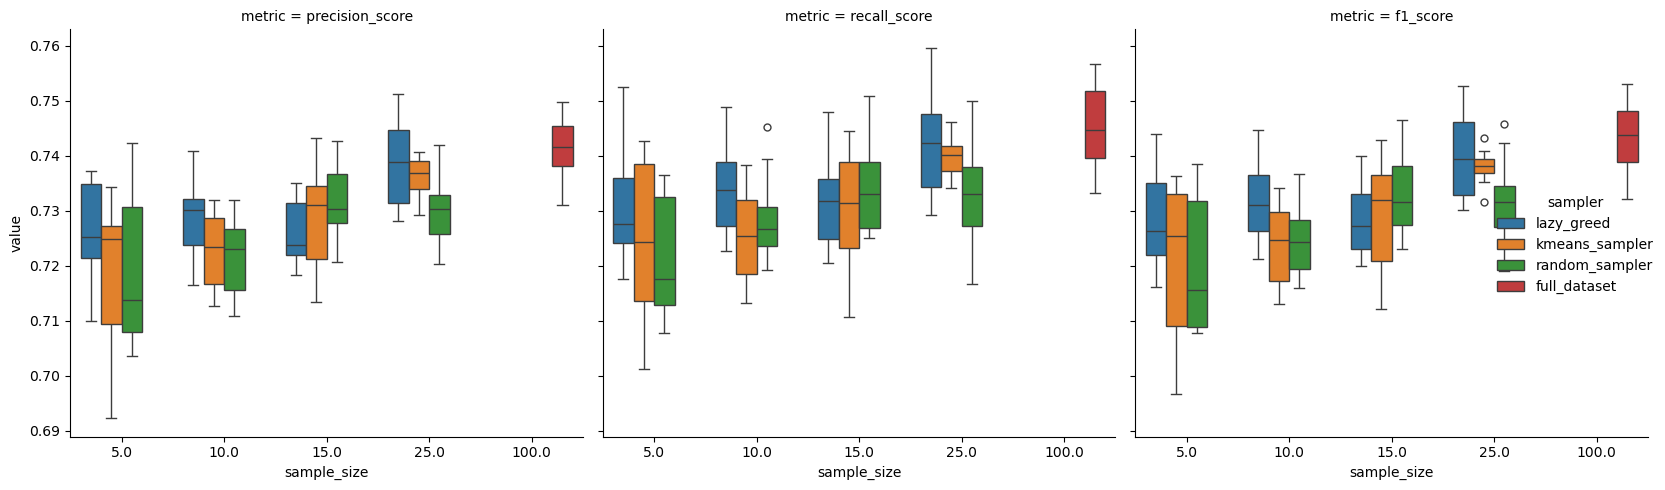

In [7]:
curdir = Path()
files = [*curdir.rglob('precision*.csv')]

print(files)

print(f'{files[5].stem.upper()}')


result = pd.read_csv(files[5])
result['sample_size'] = (result['sample_size'] / result['train_size']).round(2) * 100
sns.catplot(data=result[result.sample_size>4], x='sample_size', y='value', hue='sampler', kind='box', col='metric')
# sns.catplot(data=result, x='sample_size', y='value', hue='sampler', kind='box', col='metric')
plt.ylabel(result.metric.unique()[0])
plt.tight_layout()
plt.show()